In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Armamos un DataFrame
mu1, sigma1 = 0, 0.1    # Parámetros distribución normal 1
mu2, sigma2 = 0.2, 0.2  # Parámetros distribución normal 2
mu3 = 0.5               # Promedio distribucion normal 3
sigma3 = 0.7            # Desviación estandar distribución normal 3
n = 1000                # Cantidad de puntos
df = pd.DataFrame(
    {
        "a1": pd.np.random.normal(mu1, sigma1, n),
        "a2": pd.np.random.normal(mu2, sigma2, n),
        "a3": pd.np.random.randint(0, 5, n),
        "y1": pd.np.logspace(0, 1, num=n),
        "y2": pd.np.random.randint(0, 2, n),
    }
)

In [3]:
df

,a1,a2,a3,y1,y2
0,0.161986,0.171568,3,1.000000,1
1,0.040251,0.275855,2,1.002308,1
2,0.043589,-0.143151,0,1.004620,1
3,-0.076284,-0.106131,0,1.006939,1
4,0.068725,-0.012738,2,1.009262,0
...,...,...,...,...,...
995,-0.078912,0.306653,3,9.908228,0
996,-0.158153,0.354874,2,9.931092,0
997,0.096879,0.075001,4,9.954008,0
998,0.076489,0.092010,2,9.976978,1


In [4]:
# Se incluye una columna index con el número de fila 
df.reset_index(inplace=True)

In [5]:
df

,index,a1,a2,a3,y1,y2
0,0,0.161986,0.171568,3,1.000000,1
1,1,0.040251,0.275855,2,1.002308,1
2,2,0.043589,-0.143151,0,1.004620,1
3,3,-0.076284,-0.106131,0,1.006939,1
4,4,0.068725,-0.012738,2,1.009262,0
...,...,...,...,...,...,...
995,995,-0.078912,0.306653,3,9.908228,0
996,996,-0.158153,0.354874,2,9.931092,0
997,997,0.096879,0.075001,4,9.954008,0
998,998,0.076489,0.092010,2,9.976978,1


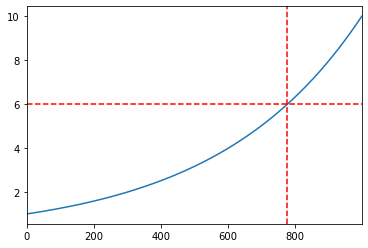

In [6]:
ax = df.y1.plot()
ax.axhline(6, color="red", linestyle="--")
ax.axvline(775, color="red", linestyle="--")

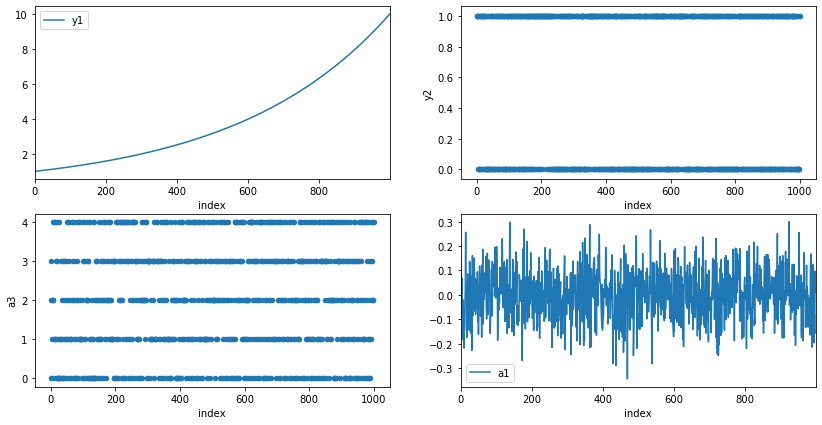

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(14,7))
df.plot(x="index", y="y1", ax=ax[0, 0])
df.plot.scatter(x="index", y="y2", ax=ax[0, 1])
df.plot.scatter(x="index", y="a3", ax=ax[1, 0])
df.plot(x="index", y="a1", ax=ax[1, 1])

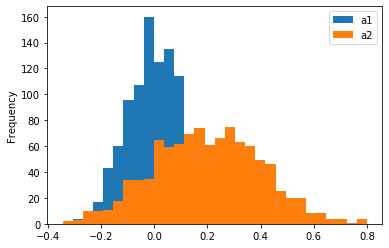

In [9]:
df[["a1", "a2"]].plot(bins=30, kind="hist")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4568c31f28>,
      dtype=object)

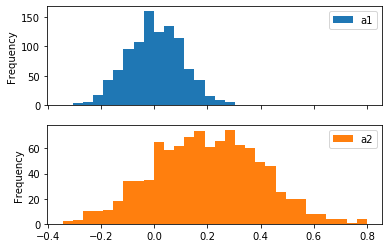

In [10]:
df[["a1", "a2"]].plot(bins=30, kind="hist", subplots=True)

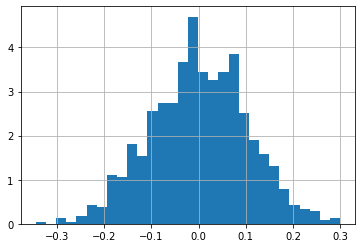

In [11]:
df.a1.hist(bins=30, density=1)

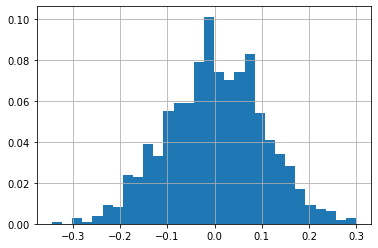

In [12]:
w = pd.np.ones_like(df.a1.values) / len(df.a1.values)
df.a1.hist(bins=30, weights=w)

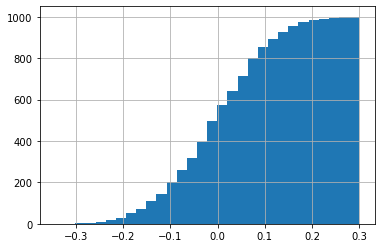

In [13]:
df.a1.hist(bins=30, cumulative=True)

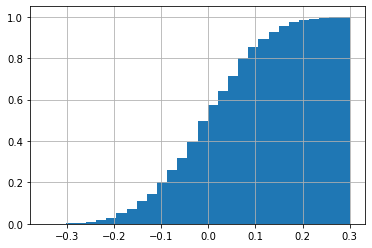

In [14]:
df.a1.hist(bins=30, cumulative=True, density=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4568c31278>,
      dtype=object)

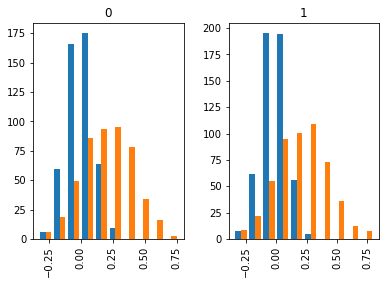

In [15]:
df[['a1', 'a2']].hist(by=df.y2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45685e3da0>,
      dtype=object)

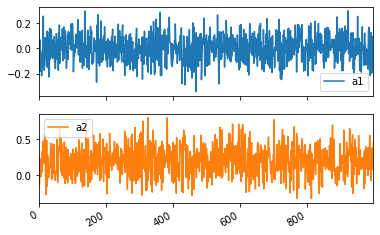

In [16]:
df[['a1', 'a2']].plot(by=df.y2, subplots=True)

In [17]:
df.a3.head()

0    3
1    2
2    0
3    0
4    2
Name: a3, dtype: int64

In [18]:
df_a4_dummy = pd.get_dummies(df.a3, prefix='a3_')
df_a4_dummy.head()

,a3__0,a3__1,a3__2,a3__3,a3__4
0,0,0,0,1,0
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [20]:
df = df.drop('a3', axis=1)
df = pd.concat([df, df_a4_dummy], axis=1)
df

,index,a1,a2,y1,y2,a3__0,a3__1,a3__2,a3__3,a3__4
0,0,0.161986,0.171568,1.000000,1,0,0,0,1,0
1,1,0.040251,0.275855,1.002308,1,0,0,1,0,0
2,2,0.043589,-0.143151,1.004620,1,1,0,0,0,0
3,3,-0.076284,-0.106131,1.006939,1,1,0,0,0,0
4,4,0.068725,-0.012738,1.009262,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,995,-0.078912,0.306653,9.908228,0,0,0,0,1,0
996,996,-0.158153,0.354874,9.931092,0,0,0,1,0,0
997,997,0.096879,0.075001,9.954008,0,0,0,0,0,1
998,998,0.076489,0.092010,9.976978,1,0,0,1,0,0


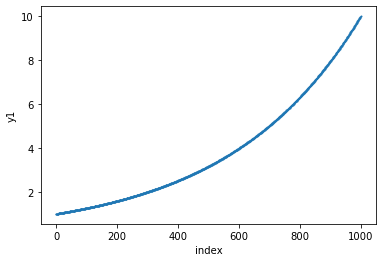

In [21]:
df.plot.scatter(x='index', y='y1', s=1)

In [22]:
df['ones'] = pd.np.ones(len(df))
m, c = pd.np.linalg.lstsq(df[['index', 'ones']], df['y1'], rcond=None)[0]

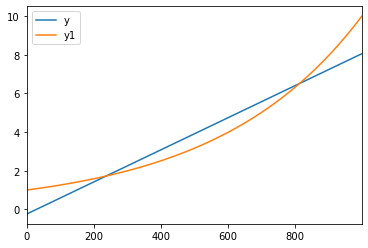

In [23]:
df['y'] = df['index'].apply(lambda x: x * m + c)
df[['y', 'y1']].plot()